### Download simulator dataset from 
https://drive.google.com/file/d/0B-Eiyn-CUQtxdUZWMkFfQzdObUE/view

Ref: https://github.com/coldKnight/TrafficLight_Detection-TensorFlowAPI#get-the-dataset

In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [14]:
with open("sim_data_annotations.yaml", 'r') as stream:
    try:
        txt = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [47]:
data = []
label = []
for i in xrange(len(txt)):
    fname = txt[i]['filename']
    if txt[i]['annotations']:
        class_name = txt[i]['annotations'][0]['class']
    else:
        class_name = 'other'
    image = np.array(ndimage.imread(fname, flatten=False))
    data.append(image.flatten())
    label.append(class_name)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42, test_size=0.1)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = DecisionTreeClassifier()

In [56]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
predictions = clf.predict(X_test)

In [64]:
classes = ['red','green','yellow','other']

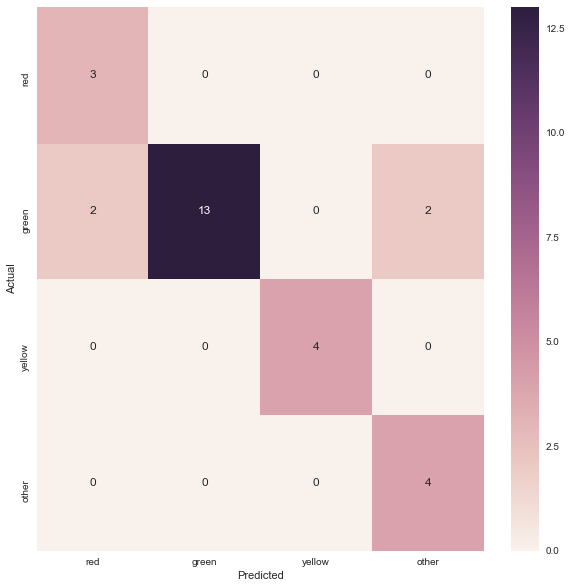

In [66]:
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
print("Accuracy: ",accuracy_score(y_test, predictions))

('Accuracy: ', 0.8571428571428571)


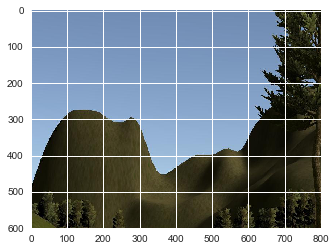

In [70]:
test_image = np.array(ndimage.imread('sim_data_capture/left0053.jpg', flatten=False))
plt.imshow(test_image)

In [73]:
clf.predict([test_image.flatten()])

array(['other'], 
      dtype='|S6')

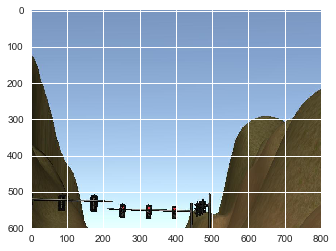

In [74]:
test_image = np.array(ndimage.imread('sim_data_capture/left0969.jpg', flatten=False))
plt.imshow(test_image)

In [75]:
clf.predict([test_image.flatten()])

array(['Red'], 
      dtype='|S6')

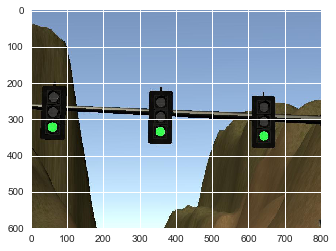

In [76]:
test_image = np.array(ndimage.imread('sim_data_capture/left1112.jpg', flatten=False))
plt.imshow(test_image)

In [77]:
clf.predict([test_image.flatten()])

array(['Green'], 
      dtype='|S6')